<a href="https://colab.research.google.com/github/Ajay2597/6220/blob/main/Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from pycaret.utils import version
version()


'2.3.6'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/Ajay2597/6220/main/Happiness.csv')
df.head(25)

,OR,Scr,GDP_PC,SS,HLE,Fre_LC,Gene,Year
0,1,7.769,1.340,1.587,0.986,0.596,0.153,1
1,1,7.632,1.305,1.592,0.874,0.681,0.202,0
2,2,7.600,1.383,1.573,0.996,0.592,0.252,1
3,2,7.594,1.456,1.582,0.861,0.686,0.286,0
4,3,7.555,1.351,1.590,0.868,0.683,0.284,0
5,3,7.554,1.488,1.582,1.028,0.603,0.271,1
6,4,7.494,1.380,1.624,1.026,0.591,0.354,1
7,4,7.495,1.343,1.644,0.914,0.677,0.353,0
8,5,7.488,1.396,1.522,0.999,0.557,0.322,1
9,5,7.487,1.420,1.549,0.927,0.660,0.256,0


In [17]:
len(df.index)

312

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OR      312 non-null    int64  
 1   Scr     312 non-null    float64
 2   GDP_PC  312 non-null    float64
 3   SS      312 non-null    float64
 4   HLE     312 non-null    float64
 5   Fre_LC  312 non-null    float64
 6   Gene    312 non-null    float64
 7   Year    312 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 19.6 KB


In [19]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [20]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


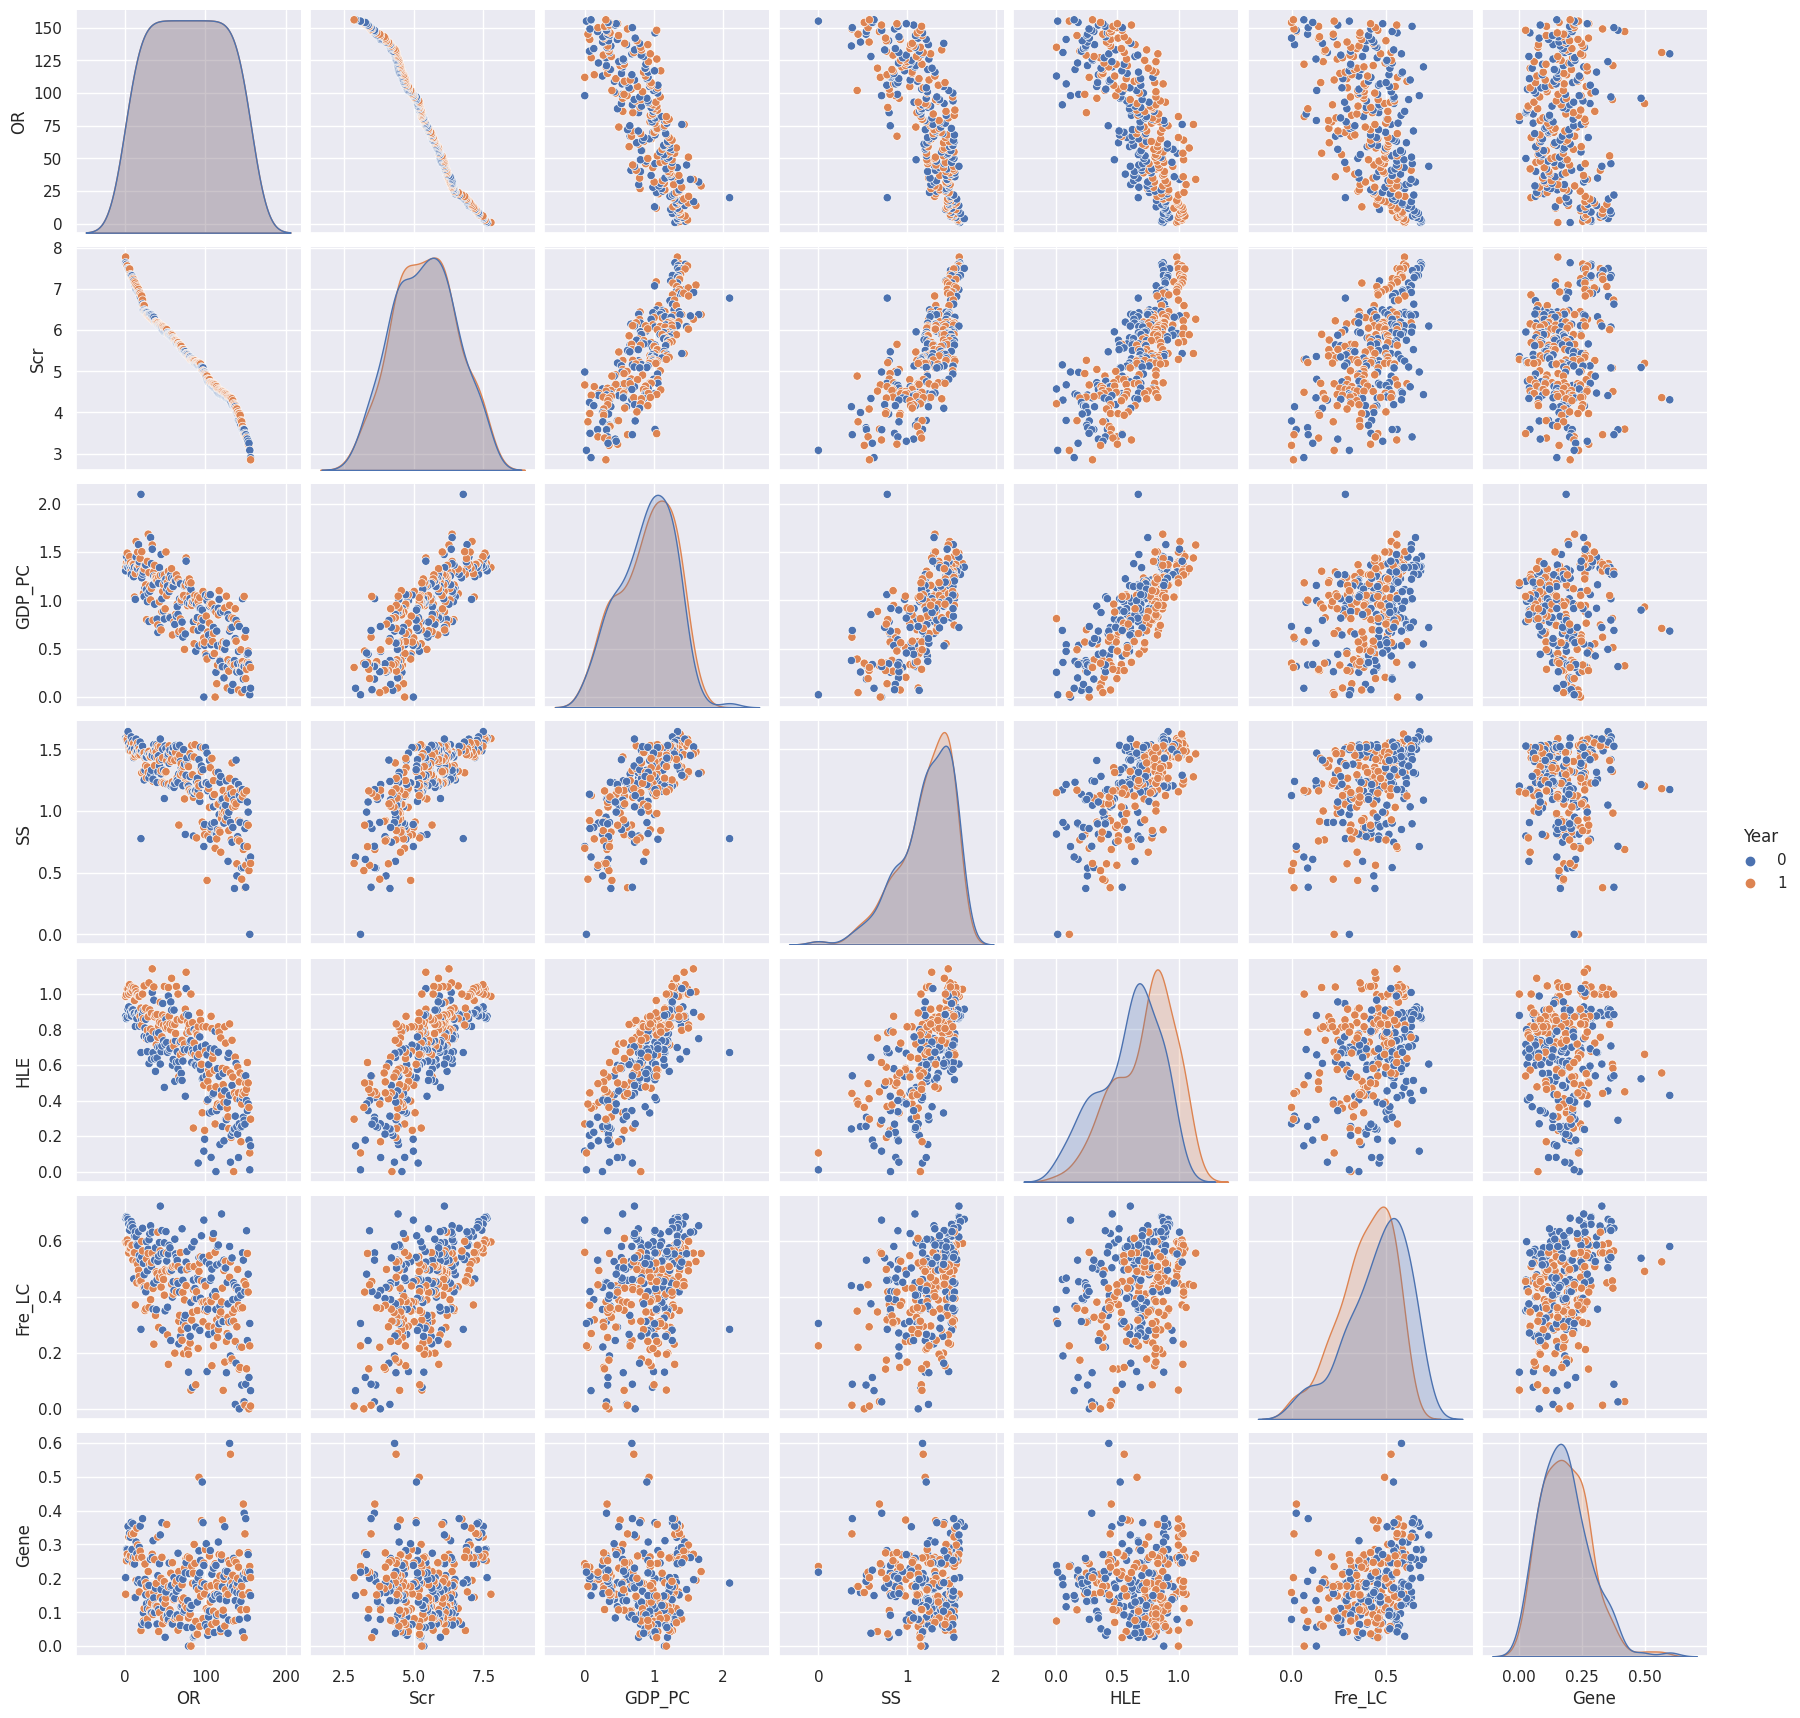

In [21]:
sns.pairplot(df, hue='Year')
plt.show()

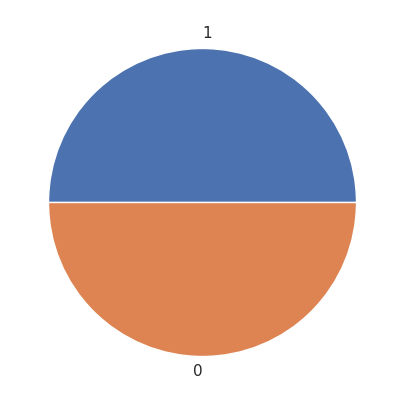

In [22]:
y =df['Year']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [23]:
X = df.drop(columns=['Year'])
X.head(10)

,OR,Scr,GDP_PC,SS,HLE,Fre_LC,Gene
0,1,7.769,1.340,1.587,0.986,0.596,0.153
1,1,7.632,1.305,1.592,0.874,0.681,0.202
2,2,7.600,1.383,1.573,0.996,0.592,0.252
3,2,7.594,1.456,1.582,0.861,0.686,0.286
4,3,7.555,1.351,1.590,0.868,0.683,0.284
5,3,7.554,1.488,1.582,1.028,0.603,0.271
6,4,7.494,1.380,1.624,1.026,0.591,0.354
7,4,7.495,1.343,1.644,0.914,0.677,0.353
8,5,7.488,1.396,1.522,0.999,0.557,0.322
9,5,7.487,1.420,1.549,0.927,0.660,0.256


In [24]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OR,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Scr,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP_PC,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
SS,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
HLE,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Fre_LC,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Gene,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598


In [25]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,OR,Scr,GDP_PC,SS,HLE,Fre_LC,Gene
0,-1.720983,2.136414,1.121186,1.253965,1.286885,1.107129,-0.309847
1,-1.720983,2.013306,1.032345,1.270641,0.843002,1.652793,0.197483
2,-1.698777,1.984551,1.230335,1.207272,1.326517,1.081451,0.715168
3,-1.698777,1.979159,1.415633,1.237289,0.791480,1.684891,1.067193
4,-1.676571,1.944114,1.149108,1.263971,0.819222,1.665632,1.046486
5,-1.676571,1.943215,1.496860,1.237289,1.453341,1.152066,0.911888
6,-1.654365,1.889299,1.222720,1.377369,1.445415,1.075032,1.771244
7,-1.654365,1.890198,1.128801,1.444074,1.001532,1.627115,1.760890
8,-1.632158,1.883908,1.263333,1.037174,1.338407,0.856766,1.439926
9,-1.632158,1.883009,1.324253,1.127226,1.053054,1.517982,0.756582


In [26]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OR,312.0,0.000000e+00,1.001606,-1.720983,-0.860492,0.000000,0.860492,1.720983
Scr,312.0,-4.554761e-16,1.001606,-2.281100,-0.788302,-0.010789,0.704945,2.136414
GDP_PC,312.0,-9.109522e-17,1.001606,-2.280179,-0.733066,0.156620,0.815317,3.040166
SS,312.0,-9.109522e-17,1.001606,-4.039063,-0.517882,0.181685,0.822051,1.444074
HLE,312.0,9.109522e-17,1.001606,-2.620872,-0.685819,0.149435,0.779590,1.901187
Fre_LC,312.0,9.109522e-17,1.001606,-2.718936,-0.648624,0.166662,0.749238,1.928835
Gene,312.0,-5.124106e-17,1.001606,-1.893962,-0.767998,-0.076889,0.642692,4.297543


In [27]:
observations = list(df.index)
variables = list(df.columns)

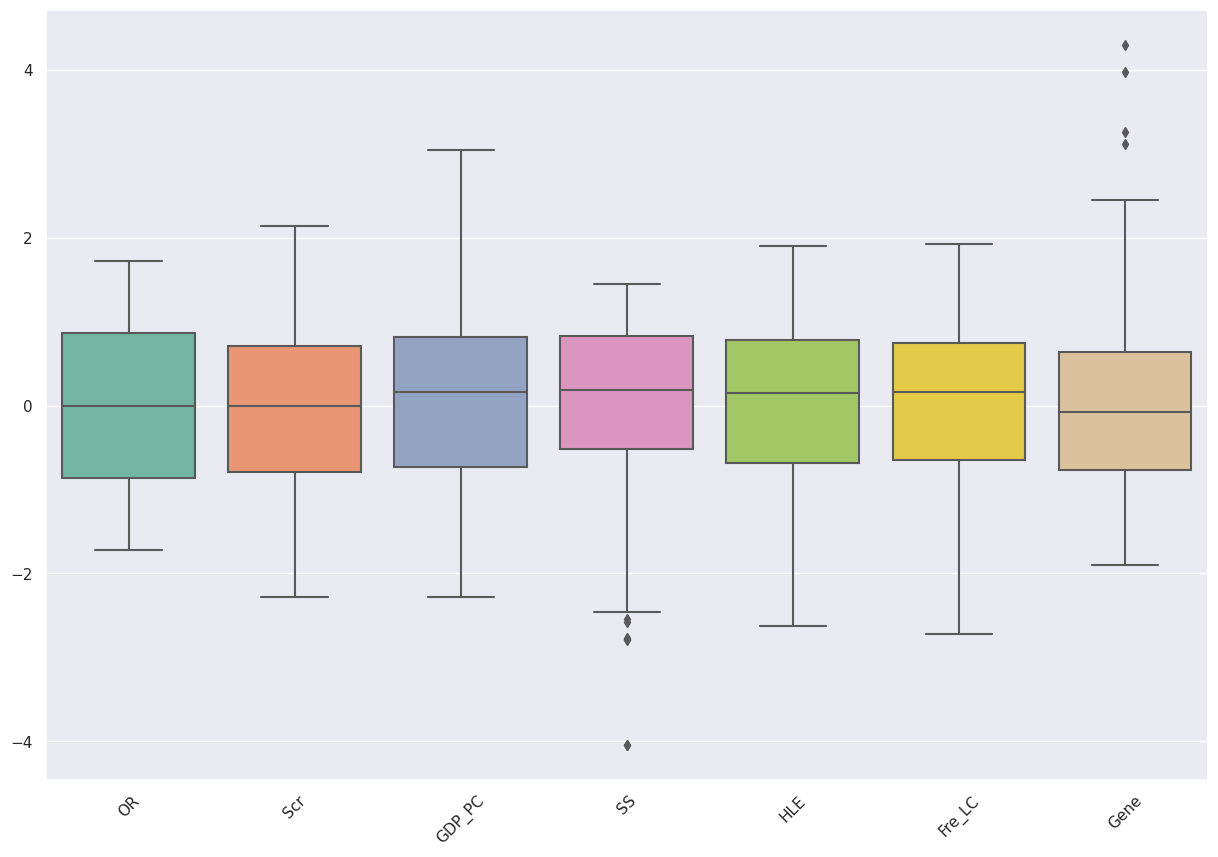

In [28]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


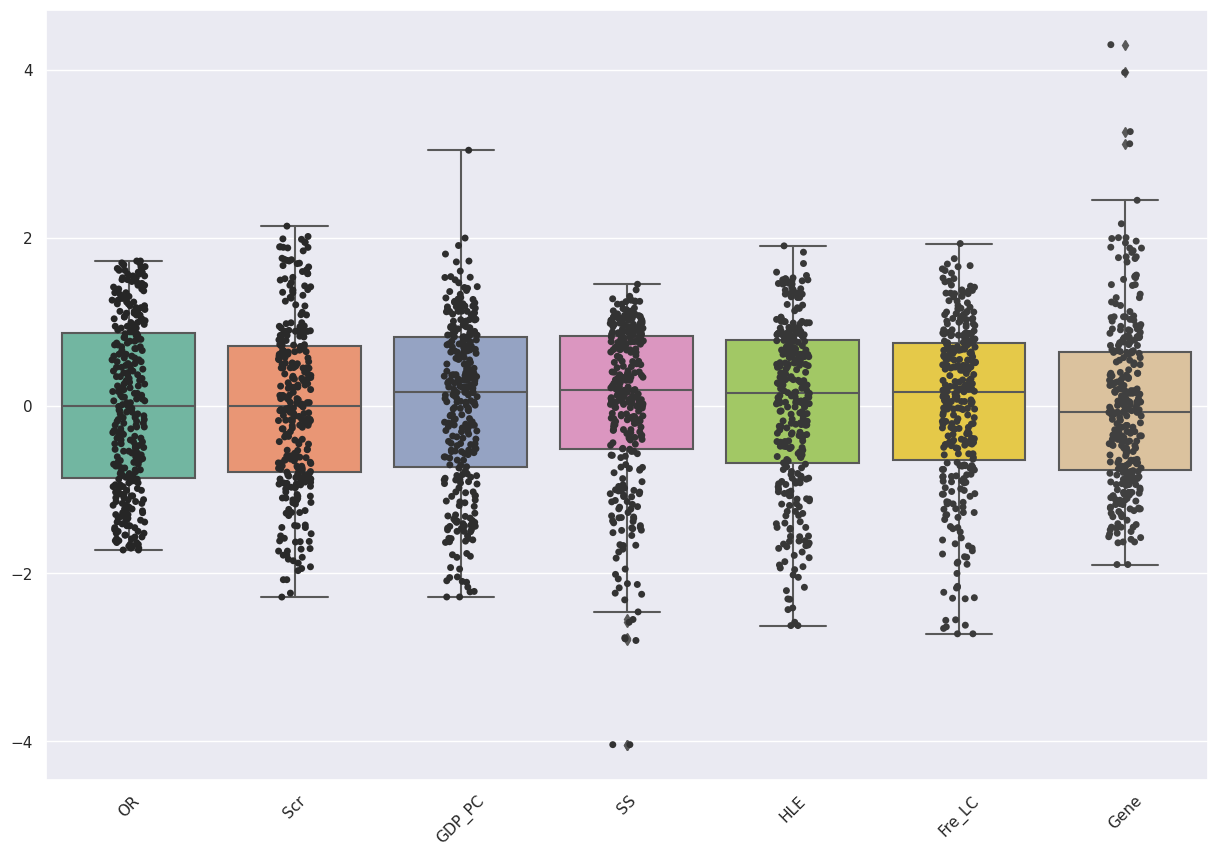

In [29]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

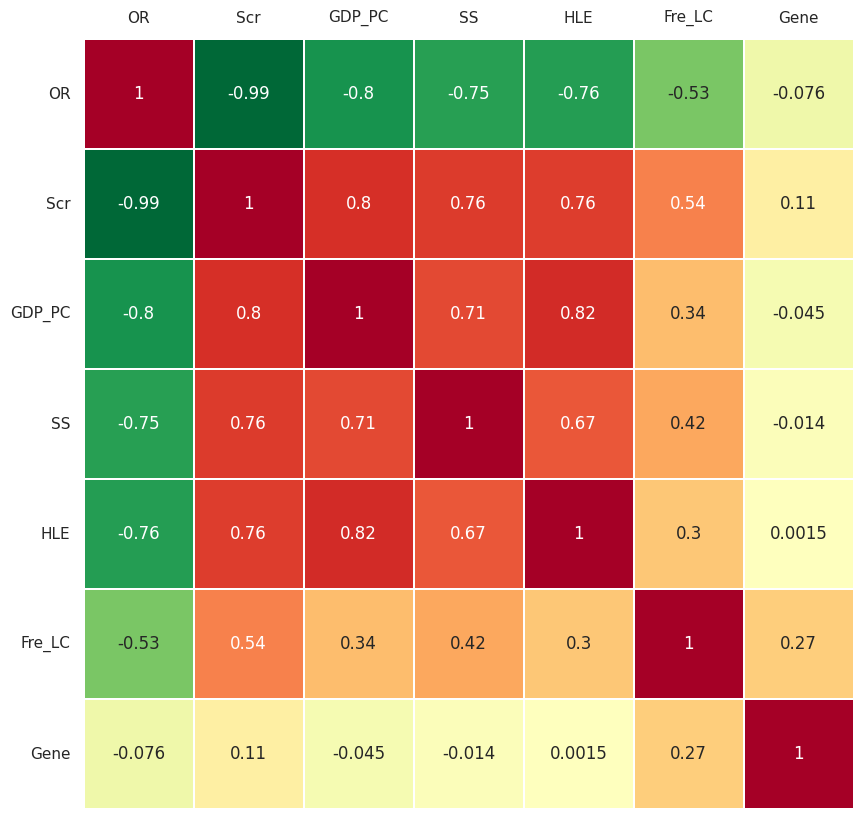

In [30]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

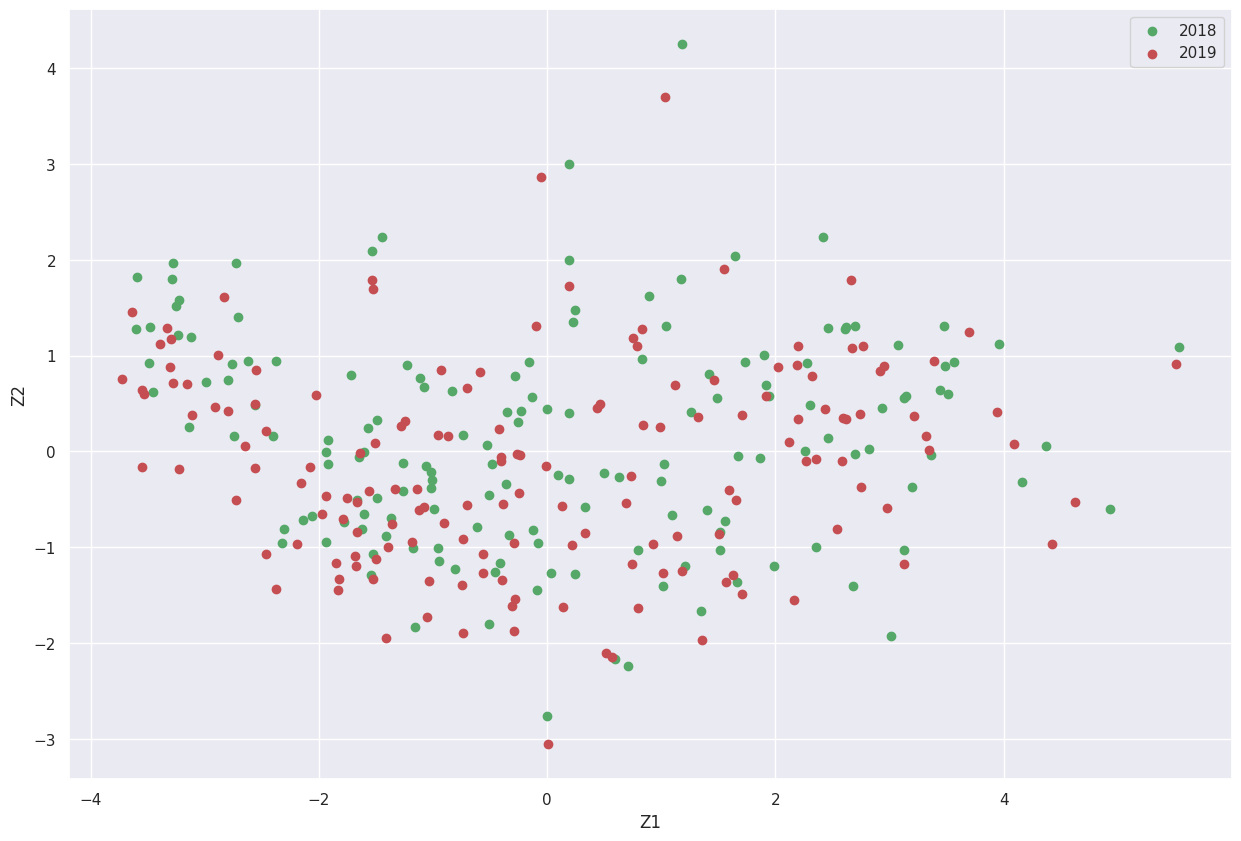

In [31]:
pca = PCA()
Z = pca.fit_transform(X)


idx_2018= np.where(y == 0)
idx_2019 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_2018,0], Z[idx_2018,1], c='g', label='2018')
plt.scatter(Z[idx_2019,0], Z[idx_2019,1], c='r', label='2019')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.4550642 , -0.01252403,  0.01892327, -0.07147081,  0.53726596,
         0.0965233 , -0.69951562],
       [-0.45627935,  0.03987827, -0.01096957,  0.0408654 , -0.51655208,
        -0.109524  , -0.71386764],
       [-0.42313702, -0.19456744,  0.1960656 ,  0.22549198,  0.21769906,
         0.80392021, -0.01138547],
       [-0.40415943, -0.097399  , -0.06656206, -0.86639953,  0.26331257,
        -0.04805316,  0.02114988],
       [-0.40703096, -0.17529254,  0.33418213,  0.36276808,  0.48406601,
        -0.57095444,  0.00332862],
       [-0.27405178,  0.49926203, -0.7313959 ,  0.21972854,  0.30374181,
         0.01115796,  0.00537319],
       [-0.03946345,  0.81909692,  0.5568049 , -0.10883862,  0.03484066,
         0.06306709,  0.02130717]])

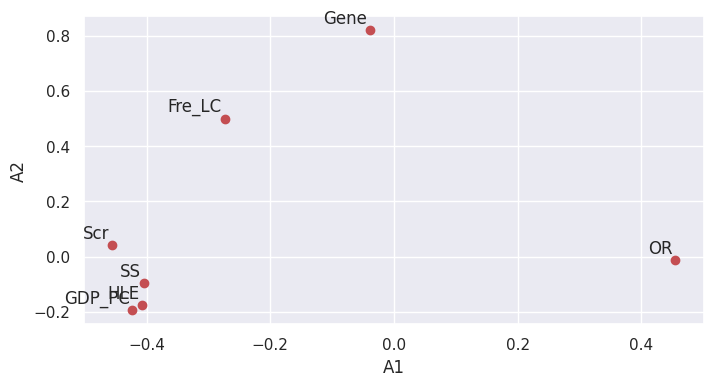

In [32]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


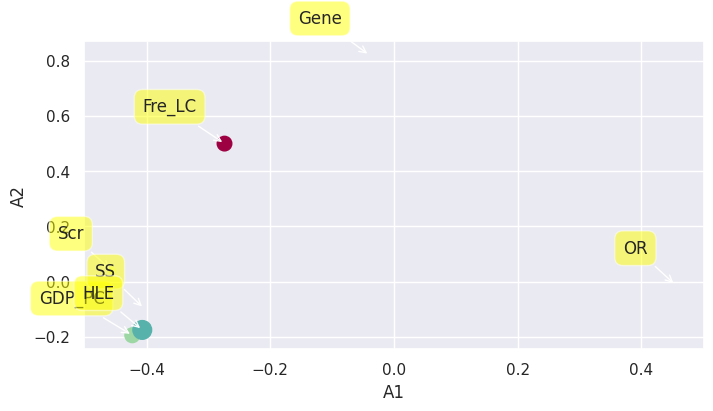

In [33]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([4.42381384, 1.18981835, 0.62291766, 0.32929183, 0.27364852,
       0.17399689, 0.00902094])

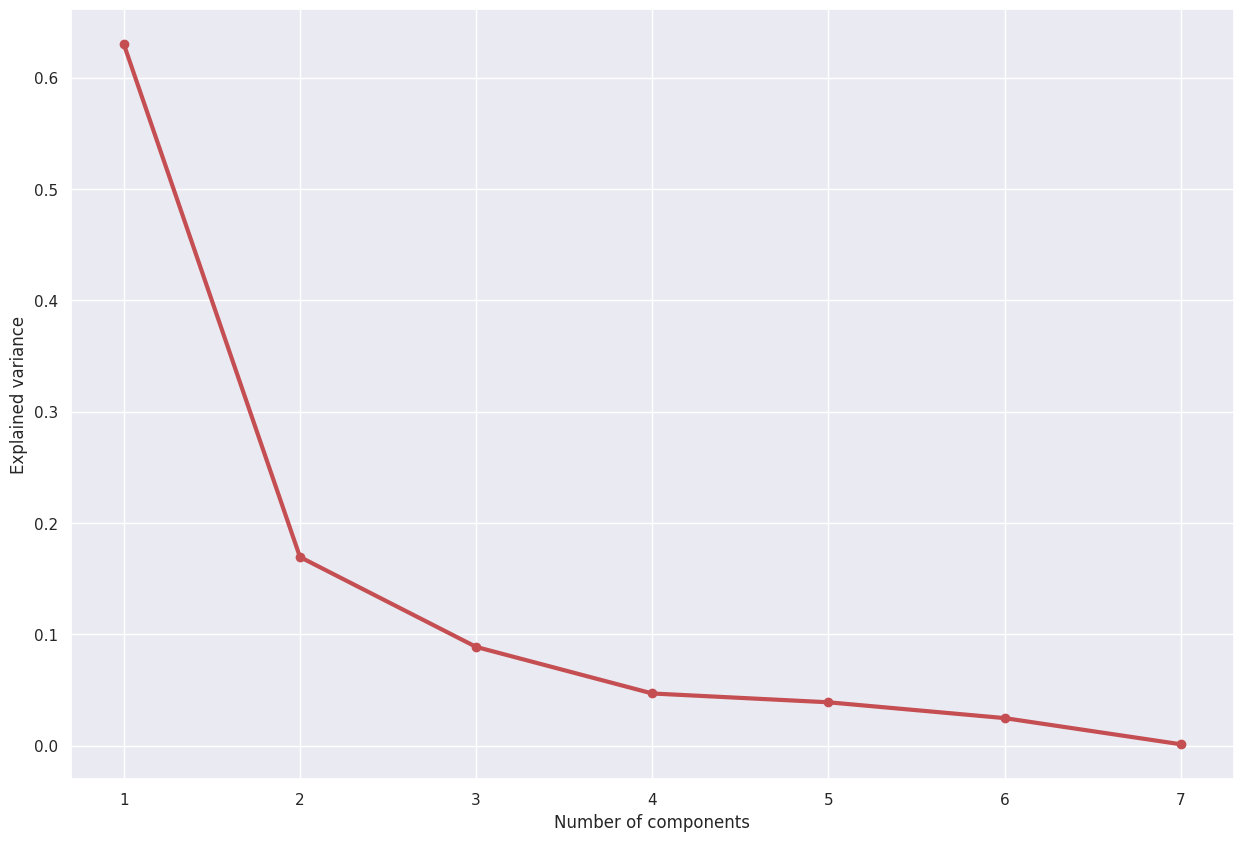

In [34]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

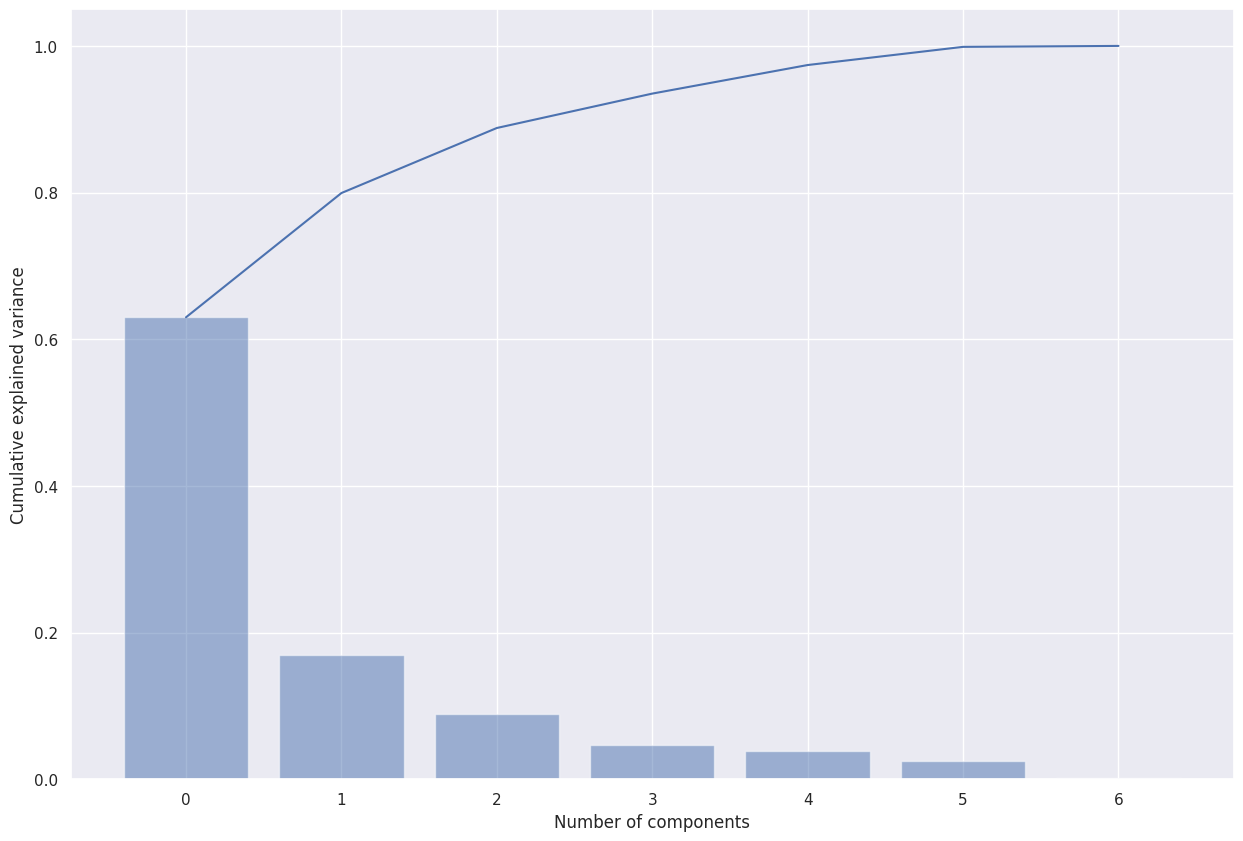

In [35]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-0.16015987,  0.61638379,  0.63663634,  1.28085029,  1.29699333,
        0.7540862 ,  1.45817781,  1.81495304,  1.12132168,  0.92107781,
        1.58464822,  0.60269588,  1.51514019,  0.71248559,  1.28739125,
        1.96124946,  0.87847893,  1.21392139,  1.804312  ,  0.3829755 ,
        1.17284483,  0.48315988,  0.72875871, -0.16837642,  0.16407   ,
        0.05331865,  1.19593889, -0.1805849 ,  0.91631466,  1.00854646,
        0.16625487,  0.70564489,  0.42571107,  0.2523945 , -0.51099969,
        0.94181282,  1.40322317,  0.49944498, -1.43783602, -0.81159709,
       -0.95189864,  0.85258583,  1.60926074,  1.9668884 , -0.8054597 ,
       -1.09479652, -1.07345906, -0.88553902, -0.05880911, -0.1575077 ,
       -0.4861965 , -0.67583601,  0.31263853, -0.13091766, -0.48323418,
       -1.16361027, -0.73386105,  0.21787045,  0.670521  , -0.96158293,
       -0.6557124 , -0.00748782, -0.99776875,  0.94562578, -0.65529376,
       -0.46410932,  0.46719642,  0.74320452, -0.74622851,  0.76

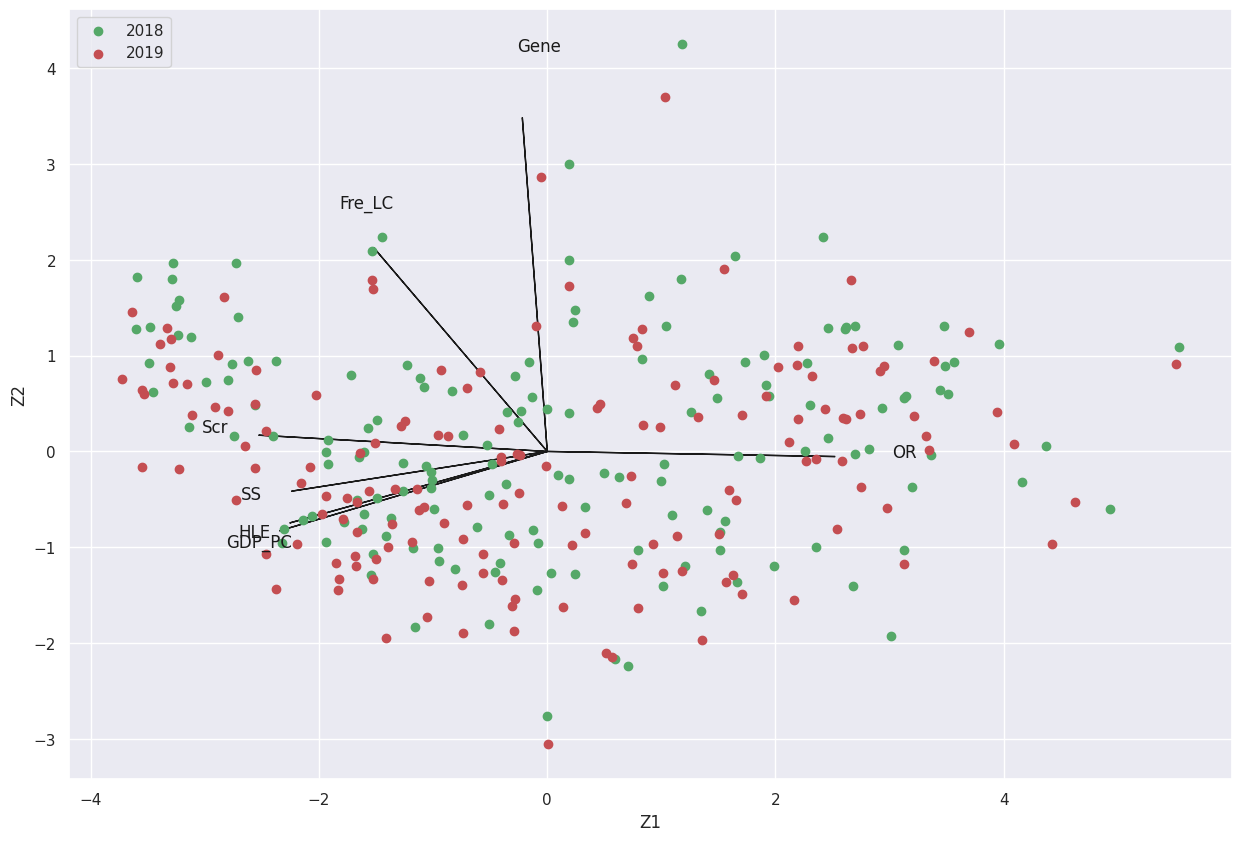

In [36]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_2018,0], Z[idx_2018,1], c='g', label='2018')
plt.scatter(Z[idx_2019,0], Z[idx_2019,1], c='r', label='2019')

plt.legend(loc='upper left')
Z1
Z2

In [37]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [39]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,-3.554162,-0.160160,-0.471863,0.120521,-0.505505
1,-3.456025,0.616384,-0.753991,-0.015337,-0.488316
2,-3.551623,0.636636,0.157490,0.074969,-0.356566
3,-3.601190,1.280850,-0.232262,-0.009290,-0.368976
4,-3.478299,1.296993,-0.273663,-0.087440,-0.383081
...,...,...,...,...,...
307,4.367633,0.061800,0.965440,0.040924,-0.468570
308,5.514301,0.911976,0.385235,1.655438,-0.996899
309,5.535902,1.091196,-0.215207,1.649711,-1.030400
310,4.934498,-0.600398,0.588994,-0.198561,-0.582055


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (62.9% expl.var)', ylabel='PC2 (16.9% expl.var)'>)

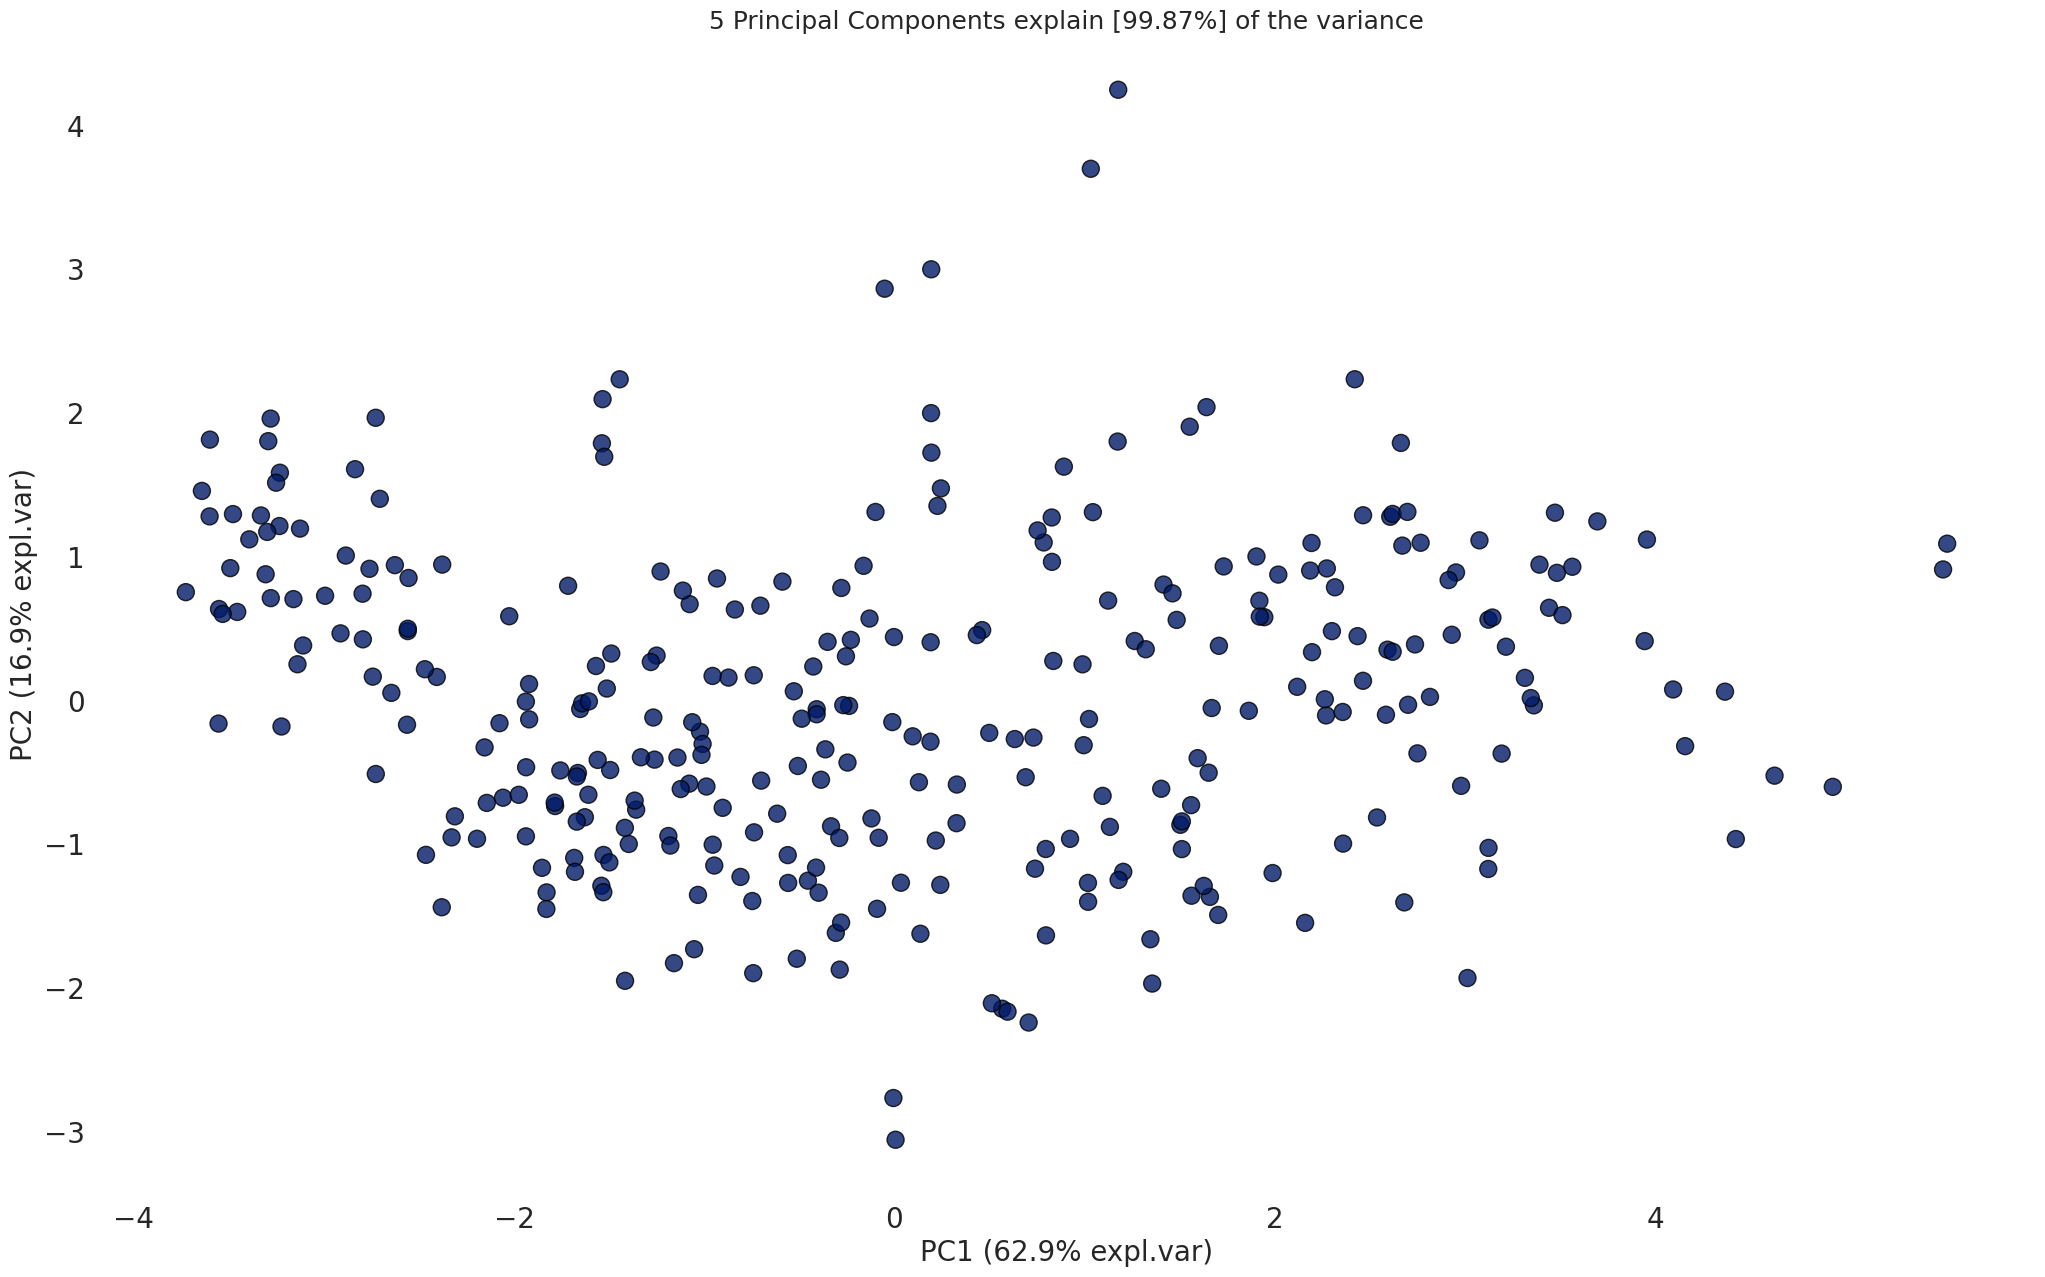

In [40]:
model.scatter(label=True, legend=False)

In [41]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5
OR,0.455064,-0.012524,0.018923,-0.071471,0.537266
Scr,-0.456279,0.039878,-0.010970,0.040865,-0.516552
GDP_PC,-0.423137,-0.194567,0.196066,0.225492,0.217699
SS,-0.404159,-0.097399,-0.066562,-0.866400,0.263313
HLE,-0.407031,-0.175293,0.334182,0.362768,0.484066
Fre_LC,-0.274052,0.499262,-0.731396,0.219729,0.303742
Gene,-0.039463,0.819097,0.556805,-0.108839,0.034841


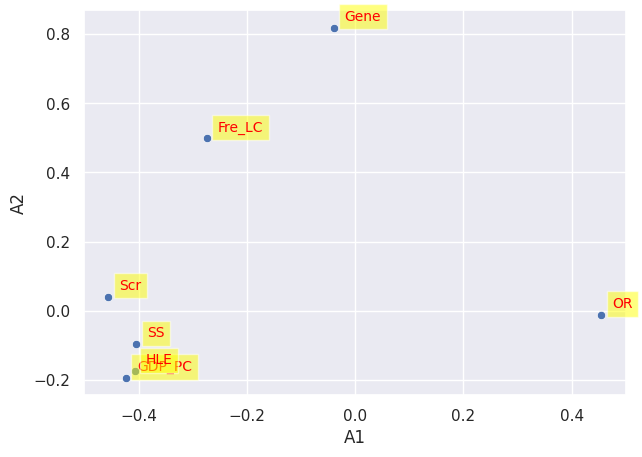

In [42]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

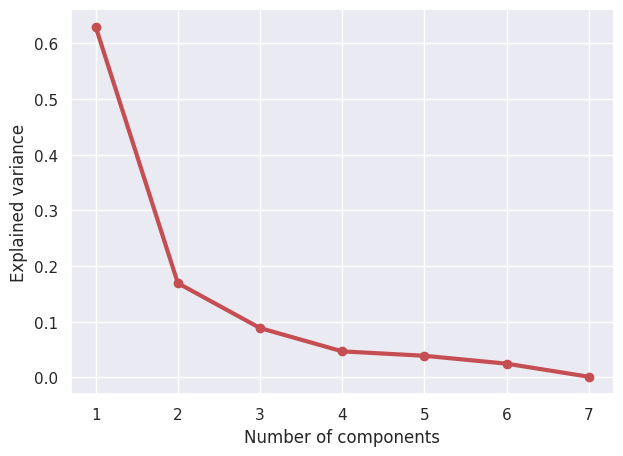

In [43]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

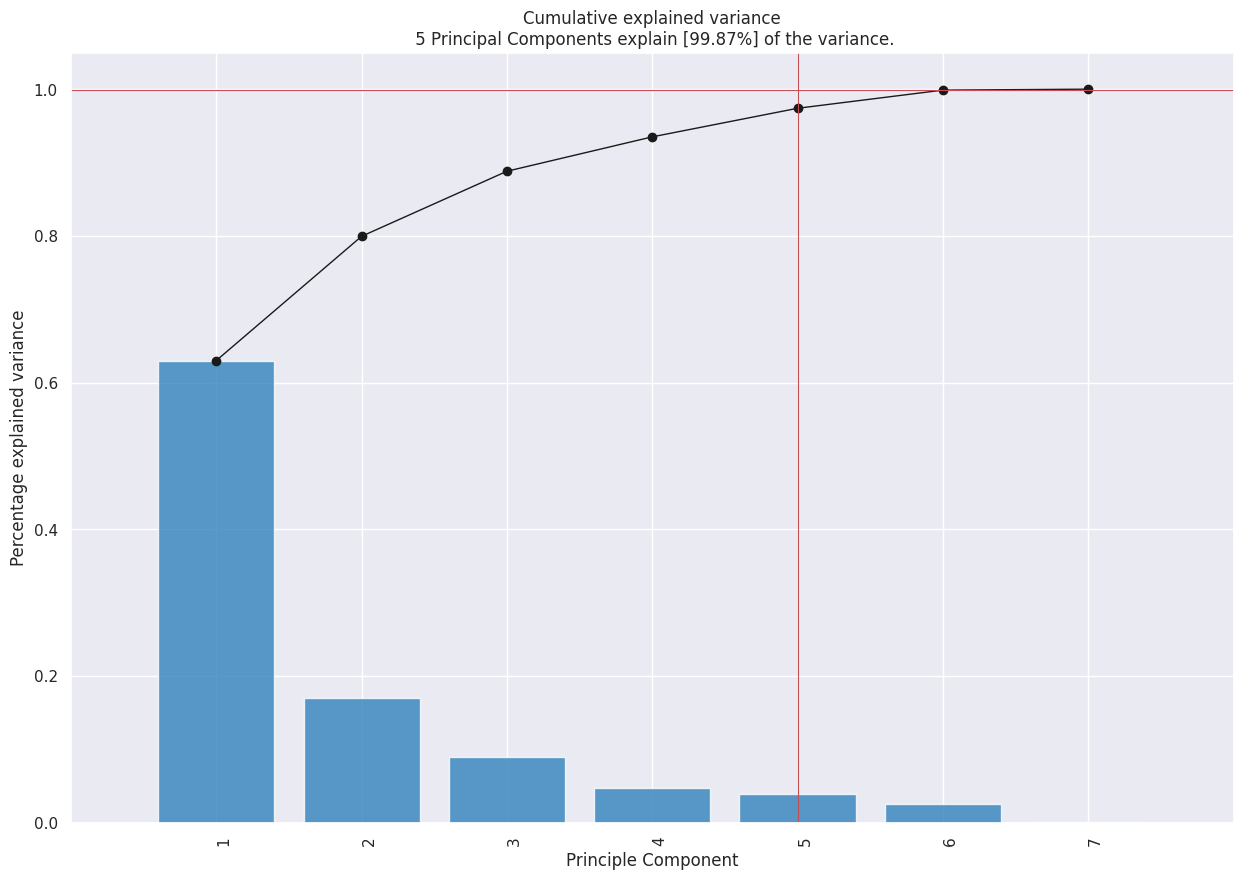

<Figure size 700x500 with 0 Axes>

In [44]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


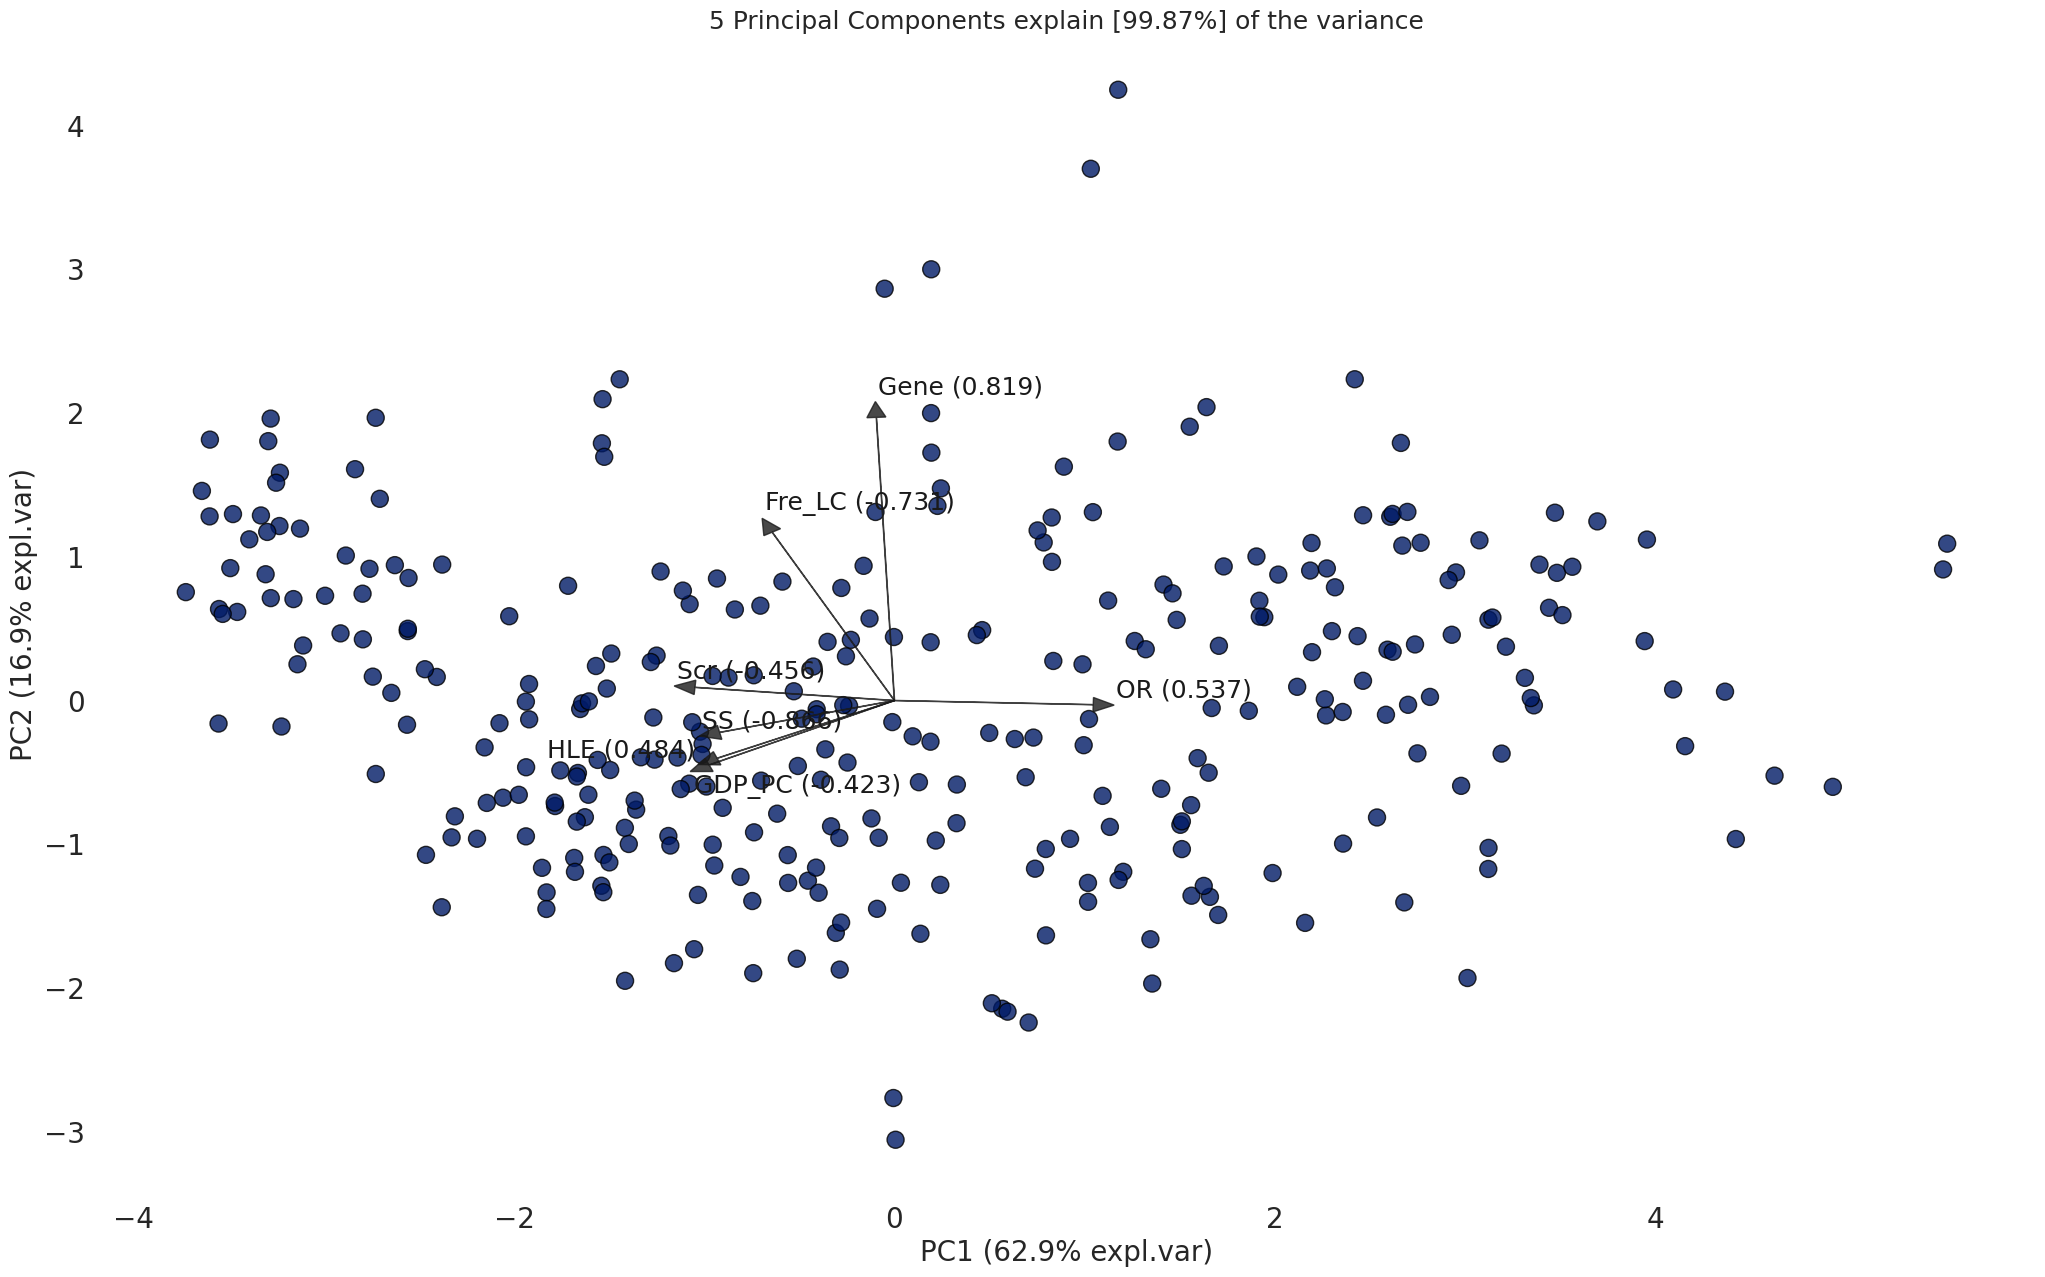

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (62.9% expl.var)', ylabel='PC2 (16.9% expl.var)'>)

In [45]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


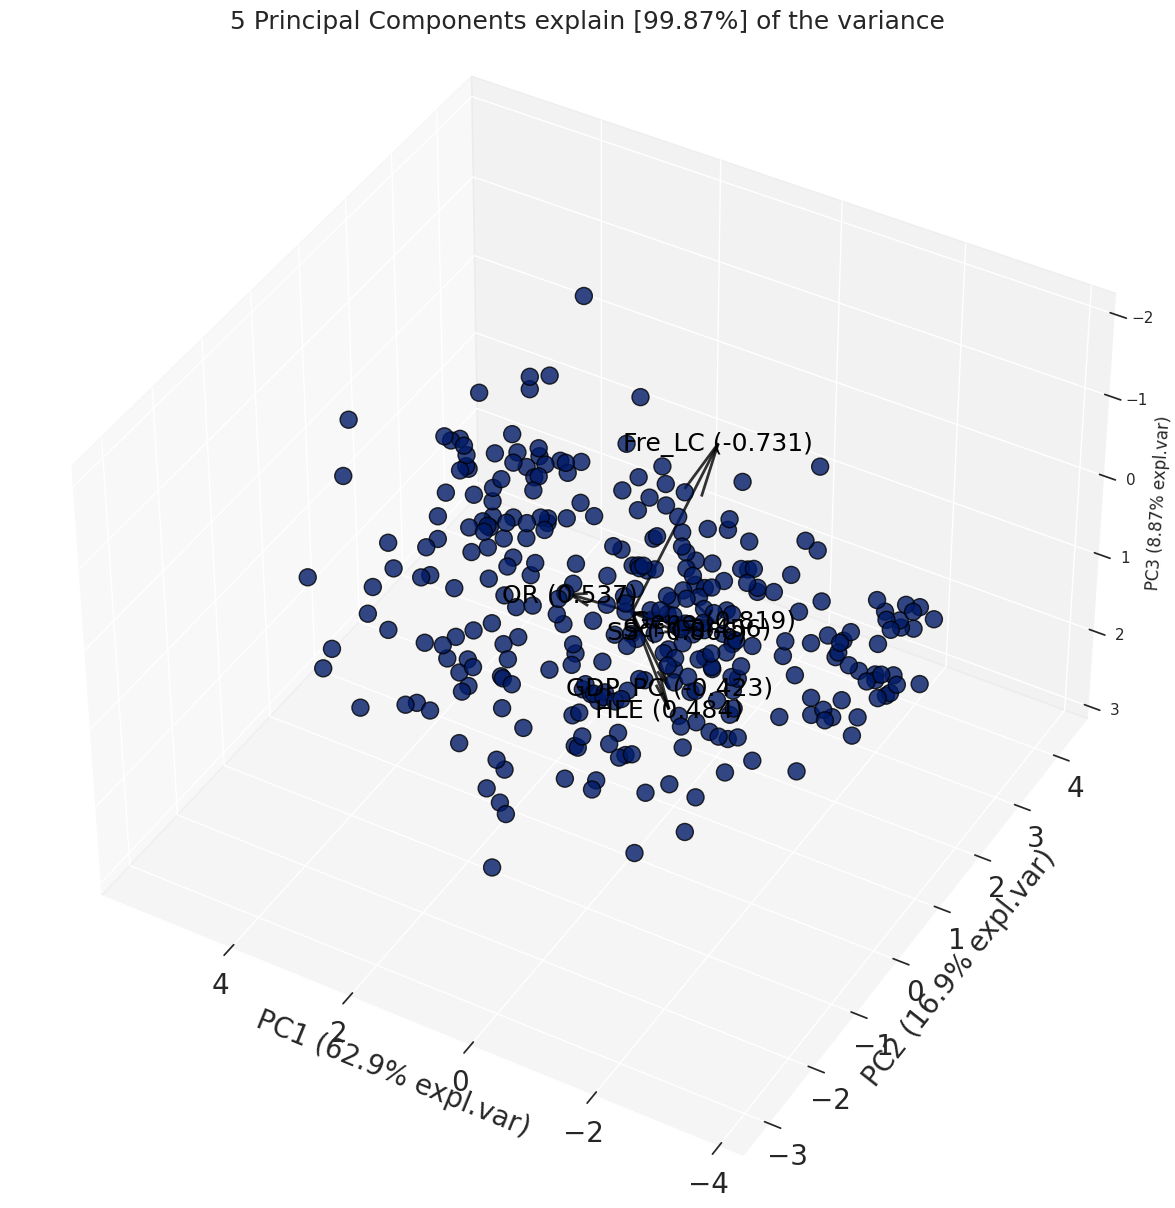

(<Figure size 2500x1500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [99.87%] of the variance'}, xlabel='PC1 (62.9% expl.var)', ylabel='PC2 (16.9% expl.var)', zlabel='PC3 (8.87% expl.var)'>)

In [46]:
model.biplot3d(legend=False)

In [47]:
from pycaret.utils import version
version()

'2.3.6'

In [48]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [49]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (281, 8)
Unseen Data For Predictions: (31, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Year', train_size=0.7, session_id=123)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=Year, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_fea

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:48:16
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
OR,Numeric
Scr,Numeric
GDP_PC,Numeric
SS,Numeric
HLE,Numeric
Fre_LC,Numeric
Gene,Numeric
Year,Label
